In [2]:
import h5py
import numpy as np

with h5py.File('../data/images.h5', 'w') as f:
    f.create_dataset('images', shape=(2,), dtype=h5py.vlen_dtype(np.uint8))

    image_path = str('../data/raw/school_notebooks_RU/images_processed/0_0.jpg')
    img = bytearray(open(image_path, 'rb').read())

    f['images'][0] = img

    image_path = str('../data/raw/school_notebooks_RU/images_processed/0_1.jpg')
    img = bytearray(open(image_path, 'rb').read())
    f['images'][1] = img

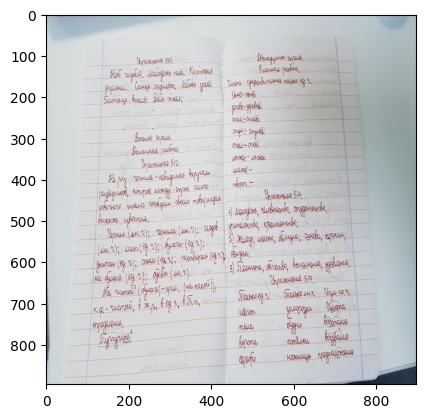

In [3]:
import cv2
import matplotlib.pyplot as plt

# read the image
with h5py.File('../data/images.h5', 'r') as f:
    img = f['images'][0]
    img = np.array(img)
    img = np.frombuffer(img, dtype=np.uint8)
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    plt.imshow(img)

In [2]:
import pandas as pd
from tqdm import tqdm
import os
import h5py
import cv2
import numpy as np


def upload_sets(dict):
    with h5py.File('../data/data_images_without_compression_1.h5', 'a') as f:
        for set_name, path in dict.items():
            data = pd.read_csv(path)

            ini_image_path = str(os.path.join('../data/raw/school_notebooks_RU/', data['image'].iloc[0]))
            image_shape = cv2.imread(ini_image_path).shape
            
            ini_target_path = os.path.join('../data/raw/school_notebooks_RU/', data['target'].iloc[0])
            target_shape = np.load(ini_target_path).shape
            
            batch_size = 2

            f.create_dataset(f'{set_name}_images',
                             shape=(len(data), *image_shape),
                             chunks=(batch_size, *image_shape))
            f.create_dataset(f'{set_name}_targets', 
                             shape=(len(data), *target_shape),
                             chunks=(batch_size, *target_shape))

            for i, row in tqdm(data.iterrows(), total=len(data)):
                ini_image_path = str(os.path.join('../data/raw/school_notebooks_RU/', row['image']))
                image = cv2.imread(ini_image_path)

                target_path = os.path.join('../data/raw/school_notebooks_RU/', row['target'])
                target = np.load(target_path)

                f[f'{set_name}_images'][i, ...] = image
                f[f'{set_name}_targets'][i, ...] = target


upload_sets({'train': '../data/raw/school_notebooks_RU/annotations_train.csv',
             'test': '../data/raw/school_notebooks_RU/annotations_test.csv',
             'val': '../data/raw/school_notebooks_RU/annotations_val.csv'})

 10%|█         | 161/1557 [00:08<01:10, 19.87it/s]


KeyboardInterrupt: 

0.0-255.0
img.shape=(896, 896, 3)
target.shape=(896, 896, 2)


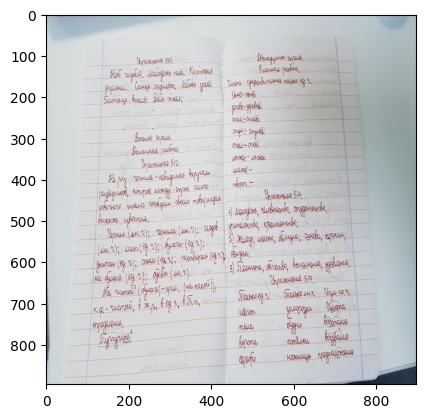

In [20]:
import cv2
import matplotlib.pyplot as plt
import io

# read the image
with h5py.File('../data/data_images_compressed.h5', 'r') as f:
    img = f['train_images'][0, ...]
    print(f"{np.min(img)}-{np.max(img)}")
    print(f"{img.shape=}")
    img = img.astype(np.uint8)
    plt.imshow(img)
    
    target = f['train_targets'][0, ...]
    print(f"{target.shape=}")

In [22]:
import h5py

f = h5py.File('../data/data_images_compressed.h5', 'r')
f['val_images'].chunks

(5, 896, 896, 3)